## NOTE: Open the GPU (Google Colab)

# 1. Dataset preparation
*   Data Set Load (Movies - TV)
*   Train, Test and Encoder (Train and Validation)

# 2. Feature Engineering
2.1 Count Vectors as features

2.2 TF-IDF Vectors as features
*   Word level
*   N-Gram level
*   Character level

2.3 Text / NLP based features

# 3. Model Building
3.1   Naive Bayes Classifier (Accuray, Confusion Matrix, Precision, Recall Score, F1 Score)

3.2   Linear Classifier (Accuray, Confusion Matrix, Precision, Recall Score, F1 Score)

3.3   Support Vector Machine (Accuray, Confusion Matrix, Precision, Recall Score, F1 Score)

# 4. Summary Statistics

# 5. Data Exploration by Visualizations

5.1 Word Density

5.2 Rating Text

5.3 Create Word Clouds

*   5.3.1 Word Cloud for Rating (Label) Score is 5, 4, 3, 2, 1

# 6. Save File CSV



# **Imports Libraries**

In [ ]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import textblob, string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# **1. Dataset preparation**
## **Data Set Load (Movies - TV)**

In [ ]:
df = pd.read_csv('Movies_TV.txt', sep='\t')
df

,Domain,Label,Rating,Review
0,Movies_TV,POS,5,my boy love this film . sometime my youngest g...
1,Movies_TV,NEU,3,on my disk the last scene of episode 2 : New E...
2,Movies_TV,POS,4,I have a 4yr old son and he love this cartoon ...
3,Movies_TV,POS,5,this sequal be wonderful . the animation be ex...
4,Movies_TV,POS,5,I really hope sci-fi never take off the doctor...
...,...,...,...,...
995,Movies_TV,POS,5,"this it the perfect way to get insipred , get ..."
996,Movies_TV,POS,4,Will Smith can do no wrong and he prove it onc...
997,Movies_TV,POS,4,Will Smith do it again ! after watch this movi...
998,Movies_TV,POS,5,I do not really think the quality could be imp...


In [ ]:
# rating as a label consider...
df_data = pd.DataFrame(columns=['Label','Review'])
df_data['Label'] = df['Rating']
df_data['Review'] = df['Review']
df_data

,Label,Review
0,5,my boy love this film . sometime my youngest g...
1,3,on my disk the last scene of episode 2 : New E...
2,4,I have a 4yr old son and he love this cartoon ...
3,5,this sequal be wonderful . the animation be ex...
4,5,I really hope sci-fi never take off the doctor...
...,...,...
995,5,"this it the perfect way to get insipred , get ..."
996,4,Will Smith can do no wrong and he prove it onc...
997,4,Will Smith do it again ! after watch this movi...
998,5,I do not really think the quality could be imp...


## **Train, Test and Encoder (Train and Validation)**
We will split the dataset into training and validation sets so that we can train and test classifier. Also, we will encode our target column so that it can be used in machine learning models.

In [ ]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df_data['Review'], 
                                                                      df_data['Label'], test_size = 0.33, 
                                                                      random_state = 42, 
                                                                      stratify = df_data['Label'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

# **2. Feature Engineering**
Raw text data will be transformed into feature vectors and new features will be created using the existing dataset. We will implement the following different ideas in order to obtain relevant features from our dataset.

2.1 Count Vectors as features

2.2 TF-IDF Vectors as features
*   Word level
*   N-Gram level
*   Character level

2.3 Text / NLP based features

# 2.1 Count Vectors as features

Count Vector is a matrix notation of the dataset in which every row represents a document from the corpus, every column represents a term from the corpus, and every cell represents the frequency count of a particular term in a particular document.

In [ ]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df_data['Review'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

# 2.2 TF-IDF Vectors as features
TF-IDF score represents the relative importance of a term in the document and the entire corpus. TF-IDF score is composed by two terms: the first computes the normalized Term Frequency (TF), the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

TF-IDF Vectors can be generated at different levels of input tokens (words, characters, n-grams)

a. Word Level TF-IDF : Matrix representing tf-idf scores of every term in different documents

b. N-gram Level TF-IDF : N-grams are the combination of N terms together. This Matrix representing tf-idf scores of N-grams

c. Character Level TF-IDF : Matrix representing tf-idf scores of character level n-grams in the corpus

In [ ]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df_data['Review'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(df_data['Review'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(df_data['Review'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:547: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  "The parameter 'token_pattern' will not be used"


# 2.3 Text / NLP based features

A number of extra text based features can also be created which sometimes are helpful for improving text classification models. Some examples are:



1.   Word Count of the documents – total number of words in the documents
2.   Character Count of the documents – total number of characters in the documents
2.   Average Word Density of the documents – average length of the words used in the documents
2.   Puncutation Count in the Complete Essay – total number of punctuation marks in the documents
2.   Upper Case Count in the Complete Essay – total number of upper count words in the documents
2.   Title Word Count in the Complete Essay – total number of proper case (title) words in the documents

Frequency distribution of Part of Speech Tags:
1.   Noun Count
2.   Verb Count
2.   Adjective Count
2.   Adverb Count
2.   Pronoun Count








In [ ]:
df_data['char_count'] = df_data['Review'].apply(len)
df_data['word_count'] = df_data['Review'].apply(lambda x: len(x.split()))
df_data['word_density'] = df_data['char_count'] / (df_data['word_count']+1)
df_data['punctuation_count'] = df_data['Review'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
df_data['title_word_count'] = df_data['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
df_data['upper_case_word_count'] = df_data['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [ ]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df_data['noun_count'] = df_data['Review'].apply(lambda x: check_pos_tag(x, 'noun'))
df_data['verb_count'] = df_data['Review'].apply(lambda x: check_pos_tag(x, 'verb'))
df_data['adj_count'] = df_data['Review'].apply(lambda x: check_pos_tag(x, 'adj'))
df_data['adv_count'] = df_data['Review'].apply(lambda x: check_pos_tag(x, 'adv'))
df_data['pron_count'] = df_data['Review'].apply(lambda x: check_pos_tag(x, 'pron'))

In [ ]:
df_data

,Label,Review,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,noun_count,verb_count,adj_count,adv_count,pron_count
0,5,my boy love this film . sometime my youngest g...,176,38,4.512821,6,3,1,10,5,3,4,4
1,3,on my disk the last scene of episode 2 : New E...,394,86,4.528736,15,8,3,26,13,4,2,4
2,4,I have a 4yr old son and he love this cartoon ...,107,26,3.962963,2,2,2,4,3,2,1,5
3,5,this sequal be wonderful . the animation be ex...,1342,281,4.758865,39,6,5,43,44,23,24,20
4,5,I really hope sci-fi never take off the doctor...,199,46,4.234043,12,5,5,5,8,3,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,"this it the perfect way to get insipred , get ...",121,28,4.172414,6,2,1,4,6,1,0,4
996,4,Will Smith can do no wrong and he prove it onc...,233,52,4.396226,13,3,0,10,8,1,3,5
997,4,Will Smith do it again ! after watch this movi...,273,61,4.403226,7,4,2,13,12,3,2,6
998,5,I do not really think the quality could be imp...,169,36,4.567568,4,2,1,8,5,4,2,2


# **3. Model Building**

There are many different choices of machine learning models which can be used to train a final model. We will implement following different classifiers for this purpose:

1.   Naive Bayes Classifier
2.   Linear Classifier
2.   Support Vector Machine

Lets implement these models and understand their details. The following function is a utility function which can be used to train a model. It accepts the classifier, feature_vector of training data, labels of training data and feature vectors of valid data as inputs. Using these inputs, the model is trained and accuracy score is computed.

In [ ]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

# **Prediction Return (Every each Model) Function**

In [ ]:
def predictions_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return predictions

# 3.1 Naive Bayes (Accuray, Confusion Matrix, Precision, Recall Score, F1 Score)
Naive Bayes is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors

In [ ]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("NB, CharLevel Vectors: ", accuracy)

NB, Count Vectors:  0.6757575757575758
NB, WordLevel TF-IDF:  0.6272727272727273
NB, N-Gram Vectors:  0.6242424242424243
NB, CharLevel Vectors:  0.6272727272727273


In [ ]:
# Naive Bayes on Count Vectors
prediction = predictions_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
conf_matrix = confusion_matrix(y_true=valid_y, y_pred=prediction)
print("NB, Count Vectors: (confusion matrix) \n", conf_matrix)
print('NB, Count Vectors: (precision): ' , precision_score(prediction, valid_y,pos_label='positive', average='micro'))
print('NB, Count Vectors: (recall score): ' , recall_score(prediction, valid_y,pos_label='positive', average='micro'))
print('NB, Count Vectors: (f1 score): ' , f1_score(prediction,valid_y,pos_label='positive', average='micro'))
print('NB, Count Vectors: (accuracy score): ' , accuracy_score(prediction, valid_y))

NB, Count Vectors: (confusion matrix) 
 [[  0   0   0   8  13]
 [  0   0   0   2  10]
 [  0   0   1   5  17]
 [  0   0   0  22  45]
 [  0   0   0   7 200]]
NB, Count Vectors: (precision):  0.6757575757575758
NB, Count Vectors: (recall score):  0.6757575757575758
NB, Count Vectors: (f1 score):  0.6757575757575758
NB, Count Vectors: (accuracy score):  0.6757575757575758


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


# 3.2 Linear Classifier (Accuray, Confusion Matrix, Precision, Recall Score, F1 Score)
Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic/sigmoid function.

In [ ]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("LR, CharLevel Vectors: ", accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LR, Count Vectors:  0.6272727272727273
LR, WordLevel TF-IDF:  0.6363636363636364
LR, N-Gram Vectors:  0.6272727272727273
LR, CharLevel Vectors:  0.6242424242424243


In [ ]:
# Linear Classifier on Count Vectors
prediction = predictions_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
conf_matrix = confusion_matrix(y_true=valid_y, y_pred=prediction)
print("LR, Count Vectors: (confusion matrix) \n", conf_matrix)
print('LR, Count Vectors: (precision): ' , precision_score(prediction, valid_y,pos_label='positive', average='micro'))
print('LR, Count Vectors: (recall score): ' , recall_score(prediction, valid_y,pos_label='positive', average='micro'))
print('LR, Count Vectors: (f1 score): ' , f1_score(prediction,valid_y,pos_label='positive', average='micro'))
print('LR, Count Vectors: (accuracy score): ' , accuracy_score(prediction, valid_y))


LR, Count Vectors: (confusion matrix) 
 [[  1   0   1   3  16]
 [  3   0   2   4   3]
 [  2   0   5   6  10]
 [  2   0   6  18  41]
 [  3   1   2  18 183]]
LR, Count Vectors: (precision):  0.6272727272727273
LR, Count Vectors: (recall score):  0.6272727272727273
LR, Count Vectors: (f1 score):  0.6272727272727273
LR, Count Vectors: (accuracy score):  0.6272727272727273


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos

# 3.3 Implementing a SVM Model (Accuray, Confusion Matrix, Precision, Recall Score, F1 Score)
Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. 

In [ ]:
# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("SVM, N-Gram Vectors: ", accuracy)

SVM, N-Gram Vectors:  0.6333333333333333


In [ ]:
# Linear Classifier on Count Vectors
prediction = predictions_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
conf_matrix = confusion_matrix(y_true=valid_y, y_pred=prediction)
print("SVM, N-Gram Vectors: (confusion matrix) \n", conf_matrix)
print('SVM, N-Gram Vectors: (precision): ' , precision_score(prediction, valid_y,pos_label='positive', average='micro'))
print('SVM, N-Gram Vectors: (recall score): ' , recall_score(prediction, valid_y,pos_label='positive', average='micro'))
print('SVM, N-Gram Vectors: (f1 score): ' , f1_score(prediction,valid_y,pos_label='positive', average='micro'))
print('SVM, N-Gram Vectors: (accuracy score): ' , accuracy_score(prediction, valid_y))

SVM, N-Gram Vectors: (confusion matrix) 
 [[  0   0   0   0  21]
 [  0   0   0   0  12]
 [  0   0   1   0  22]
 [  0   0   0   1  66]
 [  0   0   0   0 207]]
SVM, N-Gram Vectors: (precision):  0.6333333333333333
SVM, N-Gram Vectors: (recall score):  0.6333333333333333
SVM, N-Gram Vectors: (f1 score):  0.6333333333333333
SVM, N-Gram Vectors: (accuracy score):  0.6333333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


# **4. Summary Statistics**

In [ ]:
df_data.describe()

,Label,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,noun_count,verb_count,adj_count,adv_count,pron_count
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,4.289000,735.966000,151.882000,4.642070,25.48800,11.173000,3.695000,36.469000,20.532000,12.295000,10.319000,10.85300
std,1.158802,999.329338,201.632422,0.368945,40.68805,17.112156,6.912725,51.912657,26.050751,17.046541,14.565349,12.50559
min,1.000000,15.000000,4.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,4.000000,185.000000,40.000000,4.411992,5.00000,2.000000,1.000000,9.000000,5.000000,3.000000,2.000000,3.00000
50%,5.000000,370.000000,79.500000,4.658898,11.00000,5.000000,2.000000,17.000000,12.000000,6.000000,5.000000,7.00000
75%,5.000000,841.500000,175.000000,4.888315,28.00000,13.000000,4.000000,39.250000,24.000000,14.000000,12.000000,13.25000
max,5.000000,9983.000000,2039.000000,6.066667,482.00000,154.000000,117.000000,443.000000,275.000000,162.000000,144.000000,122.00000


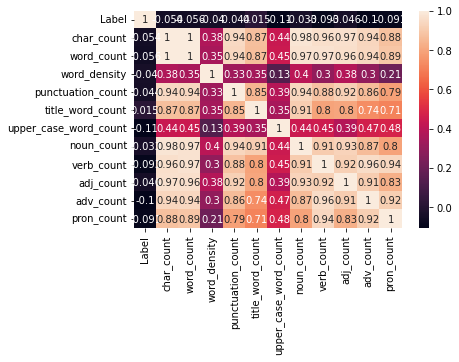

In [ ]:
corrMatrix = df_data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# **5. Data Exploration by Visualizations**

5.1 Word Density

5.2 Rating Text

5.3 Create Word Clouds

*   5.3.1 Word Cloud for Rating (Label) Score is 5, 4, 3, 2, 1




# 5.1 Word Density

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

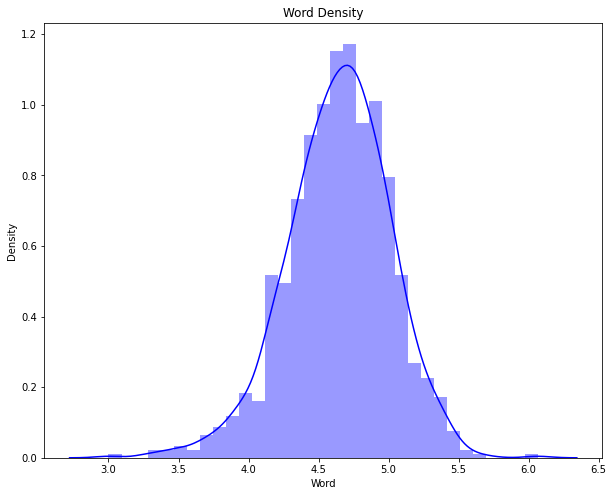

In [ ]:
fig = plt.figure(figsize=(10, 8))
sns.distplot(df_data["word_density"], color = 'blue')
plt.title('Word Density')
plt.xlabel('Word')
plt.ylabel('Density')

# 5.2 Rating Text

In [ ]:
df_data.columns

Index(['Label', 'Review', 'char_count', 'word_count', 'word_density',
       'punctuation_count', 'title_word_count', 'upper_case_word_count',
       'noun_count', 'verb_count', 'adj_count', 'adv_count', 'pron_count'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Counts'),
 Text(0.5, 0, 'Rating'),
 Text(0.5, 1.0, 'Rating Counts')]

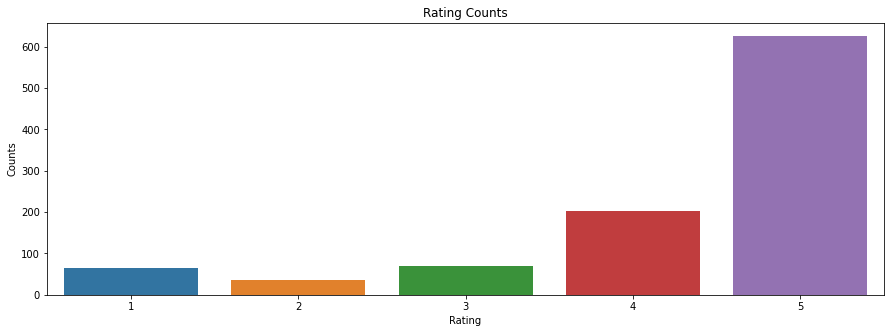

In [ ]:
# Rating 
f, axes = plt.subplots(1, figsize=(15,5))

ax1 = sns.countplot(df_data['Label'], ax = axes)
ax1.set(xlabel='Rating', ylabel='Counts', title="Rating Counts")

# 5.3 Create Word Clouds

In [ ]:
def clean_text_data(text_data):
    word_list = []
    for val in text_data:
        text = str(val)
        text = text.lower()
        tokens = word_tokenize(text)
        words = [word for word in tokens if word.isalpha()]
        for w in words:
            word_list.append(w)
    return(word_list)

In [ ]:
def create_cloud_graph(string):
    stopwords= set(STOPWORDS)|{'skirt', 'blouse','dress','sweater', 'shirt','bottom', 'pant',
                               'pants' 'jean', 'jeans','jacket', 'top', 'dresse', 'looked', 
                               'look', 'looks'}
    s = " "
    ww = s.join(string)
    wordcloud = WordCloud(width=1600, height=800, max_words = 100, stopwords = stopwords).generate(ww)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

In [ ]:
df_word_data = df_data

## 5.3.1 Word Cloud for Rating (Label) Score is 5, 4, 3, 2, 1

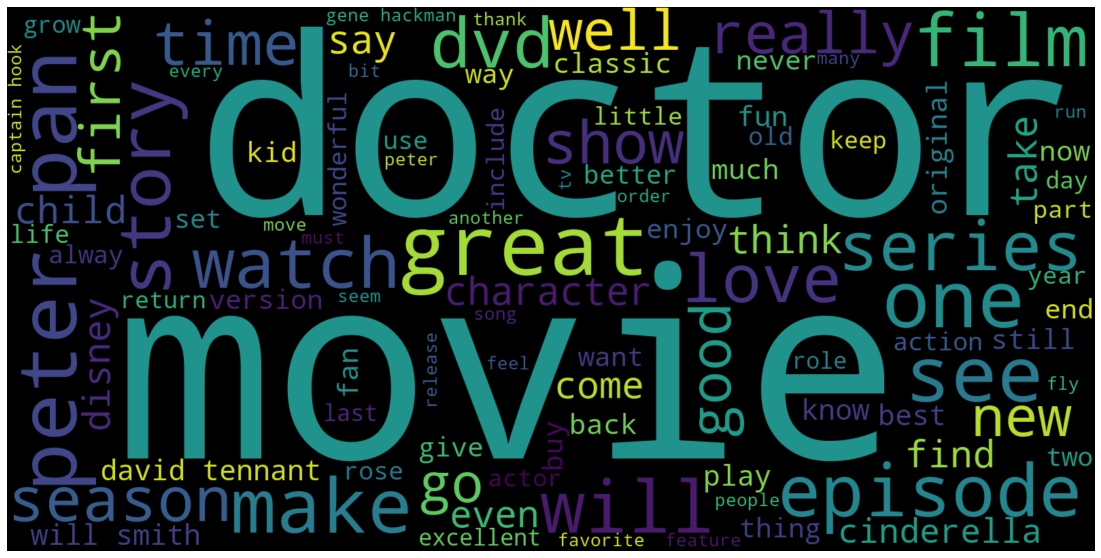

In [ ]:
#Rating = 5
rating5 = clean_text_data(df_word_data[df_word_data['Label']==5]['Review'])
create_cloud_graph(rating5)

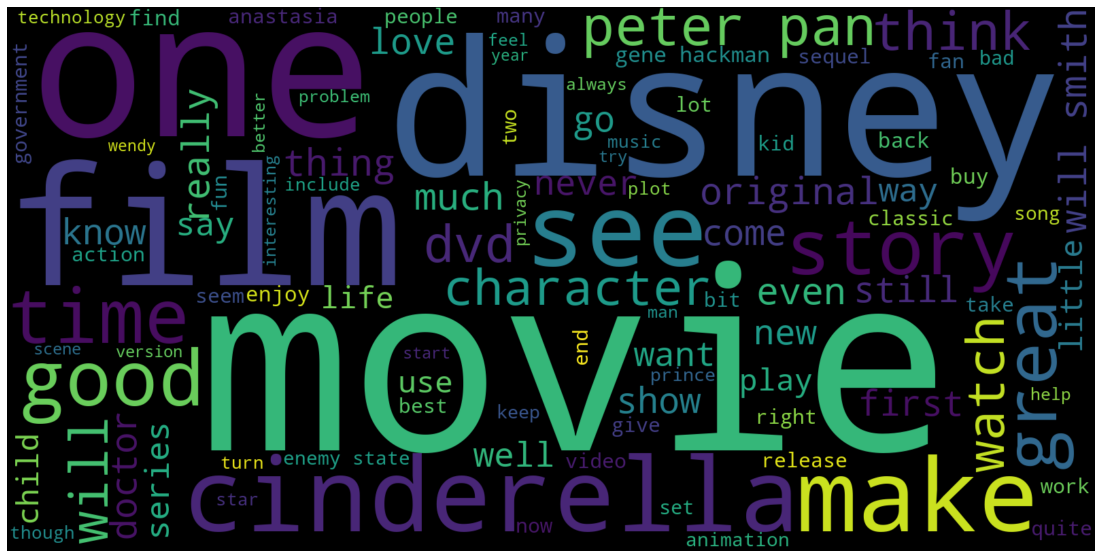

In [ ]:
#Rating = 4
rating4 = clean_text_data(df_word_data[df_word_data['Label']==4]['Review'])
create_cloud_graph(rating4)

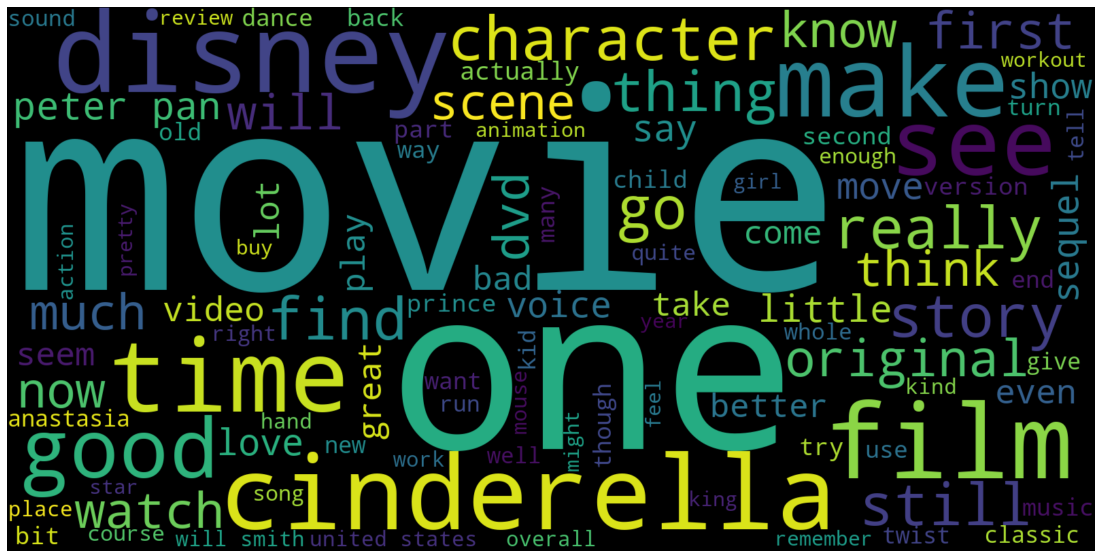

In [ ]:
#Rating = 3
rating3 = clean_text_data(df_word_data[df_word_data['Label']==3]['Review'])
create_cloud_graph(rating3)

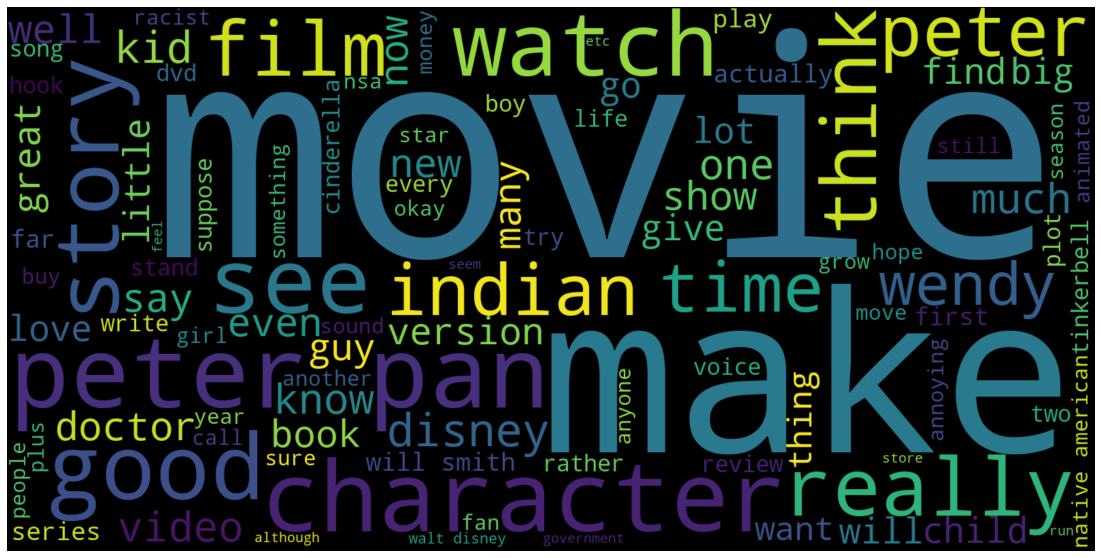

In [ ]:
#Rating = 2
rating2 = clean_text_data(df_word_data[df_word_data['Label']==2]['Review'])
create_cloud_graph(rating2)

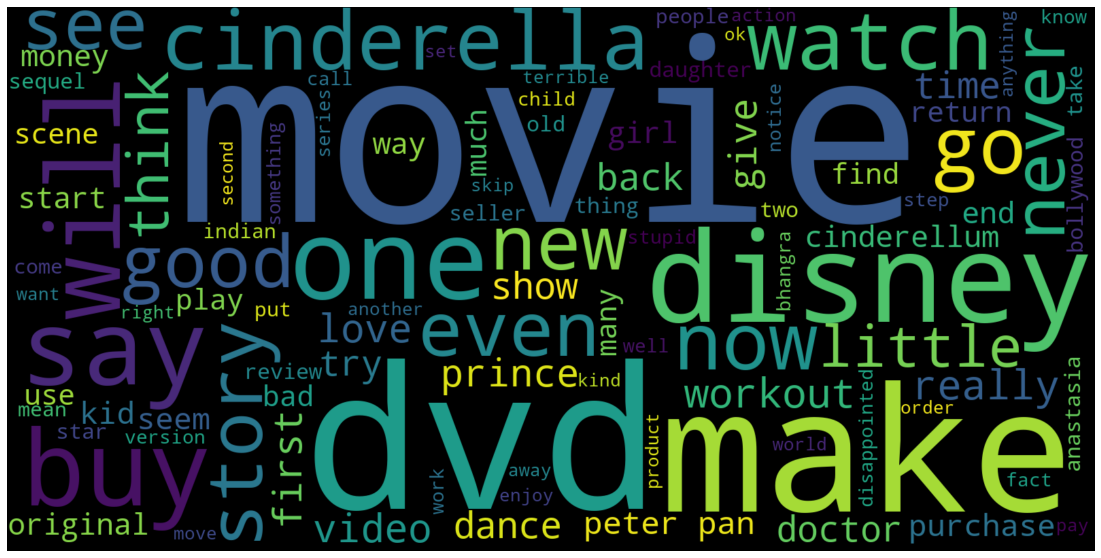

In [ ]:
#Rating = 1
rating1 = clean_text_data(df_word_data[df_word_data['Label']==1]['Review'])
create_cloud_graph(rating1)

# **6. Save File CSV**

In [ ]:
# saving the dataframe
df_data.to_csv('Text Classcification (Movie TV).csv', header=True, index=False)